# 基于细粒度特征的热红外目标追踪 Part 1

## 研究热红外图像与 RGB 图像的区别，分析热红外图像的特有视觉特性

热红外图像与 RGB 图像最明显的差别在于热红外图像不包含颜色信息且不受照明源的影响。例如，热红外图像能够清晰的显示出在照明源暗处的目标，而 RGB 图像可能会因为照明原因出现追踪目标“消失”的错觉。热红外图像与 RGB 的图像之间包含了众多异同点，这一部分的目标主要在于发掘异同点，并且从粗粒度、细粒度两方面详细分析热红外图像特有的视觉特性。

该部分所选用数据集来自日本东京大学多光谱图像识别项目下多光谱目标检测数据集中的RGB图像集与中波红外图像集，二者为同一条件下在同一场景使用不同波段的光进行拍摄，因此非常适合用于研究热红外图像与 RGB 图像的异同点

*Reference: Takumi K, Watanabe K, Ha Q, et al. Multispectral object detection for autonomous vehicles[C]//Proceedings of the on Thematic Workshops of ACM Multimedia 2017. 2017: 35-43.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

从**粗粒度**方面来看，

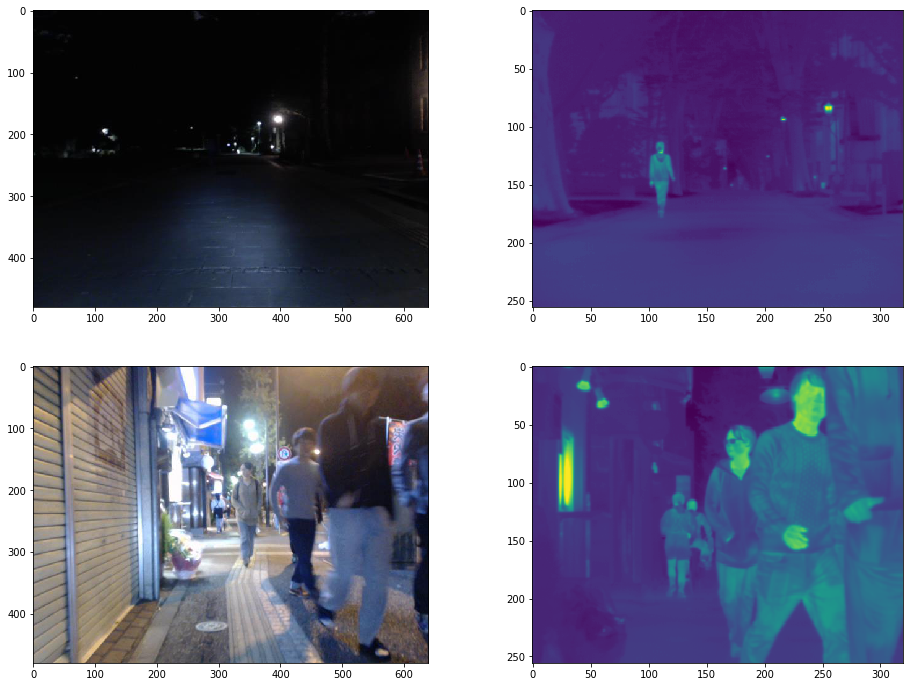

In [2]:
# 分别加载rgb图像与tir图像
im_dark_r = plt.imread('./data/RGB/RGB001.png')
im_bright_r = plt.imread('./data/RGB/RGB002.png')
im_dark_t = plt.imread('./data/TIR/TIR001.png')
im_bright_t = plt.imread('./data/TIR/TIR002.png')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16, 12))
ax[0][0].imshow(im_dark_r)
ax[0][1].imshow(im_dark_t)
ax[1][0].imshow(im_bright_r)
ax[1][1].imshow(im_bright_t)
plt.show()

从图像的成像效果来看，在光线强度较弱或无照明源的情况下，热红外图像能够准确的反映出目标（例如图中的行人）的位置，而 RGB 图像缺出现目标“消失”的情况。在光线充足的情况下，二者都能够较为清晰的反映出目标的位置。图中明亮的人行步道两侧商店灯饰和路灯作为光源在两张照片都尤为明显。光源也是热源。因而在热红外图片中能够观察出灯管与灯泡的形状， RGB 图片由于对光源敏感发光体的形状较为模糊。这展现出热红外图像的一个独特特征：对热源敏感。此外，由图可较为明显地看出热红外图像具有分辨率较低、视觉效果较为模糊的特征。

从**细粒度**方面来看，

In [3]:
print(im_dark_r.shape)
print(im_bright_r.shape)
print(im_dark_t.shape)
print(im_bright_t.shape)

(480, 640, 3)
(480, 640, 3)
(256, 320)
(256, 320)


通常，RGB 图像由三通道（红光、绿光、蓝光）组成，而热红外图像仅由单通道组成。由于不包含颜色信息，热红外图像可视为灰度图像进行后续处理。